In [8]:
import sympy
sympy.init_printing()
from IPython.display import display
import numpy as np

## Port-Hamiltonian system without dissipation

flows:
$$
f(t) := -\dot{x}(t)
$$

efforts:
$$
e(t) := \nabla H \bigl( x(t) \bigr)
$$

dynamics:
$$
-f(t) = J \bigl( x(t) \bigr) \, e(t) + G \bigl( x(t) \bigr) \, u(t)
$$
with inputs $u(t)$

outputs:
$$
y(t) = G^\mathrm{T} \bigl( x(t) \bigr) \, e(t)
$$

Solving the initial value problem
$$
\dot{x}(t) = J \bigl( x(t) \bigr) \, e(t) + G \bigl( x(t) \bigr) \, u(t)
$$
with initial condition $x(0) = x_0$
on some time interval $I = t \in \left[ 0, t_f \right]$
is in general not possible analytically.

## Continuous collocation methods

The problem can be solved numerically by splitting the time interval $I$ into $K$ subintervals
$
I^k :=
\left[ \left( k-1 \right) h, \, k h \right]
$.
The index $k = 1, 2, \ldots, K$ identifies a paricular subinterval.
The length of the subintervals has to be prescribed by chosing a time step $h$
such that $t_f = h K$.

The true solution $x(t)$ (with $t \in I$) is then approximated by the numerical solution $\tilde{x}(t)$ which is defined picewise: 
On each subinterval, $\tilde{x}(t)$ (with $t \in I^k$) is a polynomial of degree $s$ (in the variable $t$).
More precisely, if $x(t) \in \mathbb{R}^N$ then $\tilde{x}(t)$ is a vector of $N$ polynomials.

Like the time step $h$, the oder of the polynomial approximation is a parameter that has to be chosen by the user (to control the fidelity of the numerical method).

Since a polynomial of degree $s$ is determined by $s+1$ coefficients there are $s+1$ (vectorial) unknowns per interval.
The continuity of the solution between two intervals determines one (vectorial) unknown.
For the first interval $I^1$, this unknown is determined by the initial condition of the IVP.

The remaining $s$ unknowns are fixed by requiring that the differential equation has to hold at $s$ collocation points $t_1^k, \ldots, t_s^k \in I^k$.
The choice of these points within each subinterval is important for obtaining a good numerical approximation.

By defining, $t_0^k := \left( k-1 \right) h$ and $t_{s+1}^k := hk$ each subinterval can be written as $I_k = \left[ t_0^k, t_{s+1}^k \right]$.
Then the collocation points $t_1^k, \ldots, t_s^k$ can be written as
$t_i^k := t_0^k + c_i \, h$ with coefficients $c_1, \ldots, c_s$
satisfying  
$\forall \, i \in \left\{ 1, \ldots, s \right\} \: \colon \: 0 \leq c_i \leq 1$  
$\forall \, i \in \left\{ 1, \ldots, s-1 \right\} \: \colon \: c_i < c_{i+1}$.

Since on each subinterval the numerical solution $\tilde{x}(t)$ is given as a vector of polynomials of degree $s$, the time derivative $\dot{\tilde{x}}(t)$ is a vector of polynomials of degree $s-1$.

The numerical solution $\tilde{x}(t)$ with $t \in I^k$ can be written as
$$
\tilde{x}(t) =
\tilde{x}(t_0^k) + \int_{t_0^k}^t \dot{\tilde{x}}(u) \, \mathrm{d}u
\, .
$$

To make life easier, a local time coordinate $\tau^k \in \left[ 0, 1 \right]$ is defined on each subinterval $I^k$ by requiring that $t = \bigl( \left( k-1 \right) + \tau \bigr) h$.
Hence, $\tau^k = 0$ corresponds to $t_0^k$ and $\tau^k = 1$ corresponds to $t_{s+1}^k$.

Based on this normalized time, the polynomial approximation of $\dot{\tilde{x}}$ can be defined in a unified manner for all $k$:
On each subinterval, the vector $\dot{\tilde{x}}$ can be written as a linear combination
$$
\dot{\tilde{x}}(\tau^k) :=
\sum\limits_{i = 1}^s (-f_i^k) \, l_i(\tau)
\, .
$$
More precisely, the $n$-th component of $\dot{\tilde{x}}$ is a vector in the vector space that is spanned by the $s$ basis functions $l_1, \ldots, l_s$.
Given such a basis, this vector is determined by the tuple consisting of the $n$-th component of each of the vectors $f_1, \ldots, f_s$.

With this change of time coordinate and a choice of basis, equation (?) can be written as
$$
\tilde{x}(t_0^k + \tau^k \, h) =
\tilde{x}(t_0^k) + \int_0^\tau \biggl( \sum\limits_{j=1}^s (-f_j^k) \, l_j(\mu) \biggr) \, h \, \mathrm{d} \mu =
\tilde{x}(t_0^k) - h \, \sum\limits_{j=1}^s \biggl( f_j^k \, \int_0^\tau l_j(\mu) \, \mathrm{d} \mu \biggr)
\, .
$$

The collocation method is based on relating $\dot{\tilde{x}}$ and $\tilde{x}$ at the $s$ collocation points $c_1, \ldots, c_s$ (in normalized time).
Hence, it is convenient to chose the basis polynomials such that the $n$-th component of $f_i$ expresses the value of the $n$-th component of $\dot{\tilde{x}}$ at $\tau = c_i$, i.e. $-f_i \overset{!}{=} \dot{\tilde{x}}(c_i)$.

These basis polynomials are the Lagrange polynomials
$$
l_i(\tau) :=
\prod\limits_{\substack{j = 1 \\ j \neq i}}^s \frac{\tau - c_j}{c_i - c_j}
$$
which have the desired property $l_i(c_j) = \delta_{ij}$ (Kronecker delta).

The value of the numerical solution $\tilde{x}$ at the beginning of each subinterval $I^k$ shall be denoted by $x_0^k := \tilde{x}(t_0^k)$.
This value is known because of the continuity of the solution between subintervals or because of the initial condition (?), i.e. $x_0^1 = x_0$ and $x_0^{k} = x_{s+1}^{k-1}$ for $k > 1$.

By defining 
$$
b_j := \int_0^1 l_j(\mu) \, \mathrm{d} \mu
$$
the numerical solution at the endpoint of a subinterval can be written as
$$
x_{s+1}^k := \tilde{x}(t_{s+1}^k) =
x_0^k - h \, \sum\limits_{j=1}^s \Bigl( b_j \, f_j^k \Bigr)
\, .
$$
It is the main goal of all computation done at a particular step $k$ to obtain the value $x_{s+1}^k$ which is determined by the result $x_{s+1}^{k-1} = x_0^k$ of the previous step and the coefficients $f_1^k, \, \ldots, f_s^k$.

These coefficients have to be determined by solving a (nonlinear) system of equations:
Equation (?) has to hold at the collocation points $t_1^k, \ldots, t_s^k$.
Hence, the system of equation defines a relationship between the values of the derivative of the numerical solution at the collocation points given by the the unknowns $f_1^k, \ldots, f_s^k$ and the values of the numerical solution at the collocation points $\tilde{x}(t_1^k), \ldots, \tilde{x}(t_s^k)$ which in turn also depend on $f_1^k, \ldots, f_s^k$.

By defining
$$
a_{ij} := \int_0^{c_i} l_j(\mu) \, \mathrm{d} \mu
$$ the numerical solution $\tilde{x}$ can conveniently be expressed at the collocation points:
$$
x_i^k := \tilde{x}(t_i^k) =
x_0^k - h \, \sum\limits_{j=1}^s \Bigl( a_{ij} \, f_j^k \Bigr)
$$
for $i = 1, \ldots, s$.

The following definitions are introduced for convenience:
$$
J_i^k := J(x_i^k)
$$

$$
e_i^k := \left. \nabla H(x) \right|_{x = x_i^k}
$$

$$
G_i^k := G(x_i^k)
$$

$$
u_i^k := u(t_i^k)
$$

Then, the system of equations which has to be solved at the $k$-th step can be written as
$$
f_i^k + J_i^k \, e_i^k + G_i^k \, u_i^k = 0
$$
for $i = 1, \ldots, s$.
In the general case, every term of the above equation except for $u_i^k$ depends on (a subset of) the unknowns $f_1^k, \ldots, f_s^k$.

By introducing the block vectors and matrices
$$
f^k := \left[ (f_1^k)^\mathrm{T}, \ldots, (f_s^k)^\mathrm{T} \right]^\mathrm{T}
$$

$$
J^k := \mathrm{blockdiag}(J_1^k, \ldots, J_s^k)
$$

$$
e^k := \left[ (e_1^k)^\mathrm{T}, \ldots, (e_s^k)^\mathrm{T} \right]^\mathrm{T}
$$

$$
G^k := \mathrm{blockdiag}(G_1^k, \ldots, G_s^k)
$$

$$
u^k := \left[ (u_1^k)^\mathrm{T}, \ldots, (u_s^k)^\mathrm{T} \right]^\mathrm{T}
$$
the system of equations () can be written as
$$
f^k + J^k \, e^k + G^k \, u^k = 0
$$

### Gauss-Legendre collocation

Gauss-Legendre collocation methods use the roots of the shifted Legendre polynomial
$$
\frac{1}{s!} \frac{\mathrm{d}^s}{\mathrm{d} x^s} \Bigl( \bigl( x \left( x - 1 \right) \bigr)^s \Bigr)
$$
as coefficients $c_1, \,\ldots, c_s$.

Shifted Legendre polynomials of degree s = 1, 2, 3 and their roots:

s = 1:




s = 2:


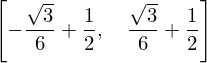



s = 3:


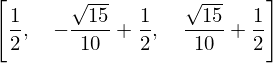

In [54]:
# compute shifted Legendre polynomials up to degree s_max and their roots
s_max = 3
range_ = range(1, s_max+1)
print(f"Shifted Legendre polynomials of degree s = {', '.join([str(s) for s in range_])} and their roots:\n")

from sympy.abc import x
for s in range_:
    print(f"s = {s}:")
    P = (x**s * (x - 1)**s).diff(x, s).simplify() / sympy.factorial(s)
    display(P)
    C = sympy.solve(P)
    display(C)
    display([round(float(c), 3) for c in C])
    print("\n")

Butcher tableau for Gauss-Legendre collocation method of order 4:

Shifted Legendre polynomial of degree 2:


Roots / collocation points / coefficients C:


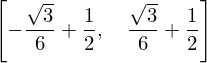

array([0.21132487, 0.78867513])

Lagrange basis polynomials:


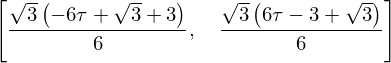

Coefficients A:


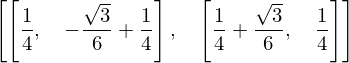

array([[ 0.25      , -0.03867513],
       [ 0.53867513,  0.25      ]])

Coefficients B:


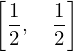

array([0.5, 0.5])

In [115]:
s = 2
print(f"Butcher tableau for Gauss-Legendre collocation method of order {2*s}:\n")

from sympy.abc import tau, x

print(f"Shifted Legendre polynomial of degree {s}:")
P = (x**s * (x - 1)**s).diff(x, s).simplify() / sympy.factorial(s)
display(P)

print(f"Roots / collocation points / coefficients C:")
C = sympy.solve(P)
C.sort()
Cf = np.array([float(c) for c in C])
display(C)
display(Cf)

print("Lagrange basis polynomials:")
L = []
for i in range(1, s+1):
    l = 1
    for j in range(1, s+1):
        if j != i:
            l = (l * (tau - C[j-1]) / (C[i-1] - C[j-1])).simplify()
    L.append(l)
display(L)

print("Coefficients A:")
A = [[sympy.integrate(l, (tau, 0, c)).simplify() for l in L] for c in C]
Af = np.array([[float(a) for a in r] for r in A])
display(A)
display(Af)

print("Coefficients B:")
B = [sympy.integrate(l, (tau, 0, 1)).simplify() for l in L]
Bf = np.array([float(b) for b in B])
display(B)
display(Bf)

In [111]:
# harmonic oscillator

q = sympy.Symbol('q')
p = sympy.Symbol('p')
x = sympy.Matrix([q, p])

J = sympy.Matrix([[0, 1], [-1, 0]])

m = 0.1 
k = 5
H = sympy.Rational(1,2) * p * 1/m * p + sympy.Rational(1, 2) * q * k * q
e = sympy.Matrix([H.diff(e) for e in x])

In [ ]:
t_f = 10.0
x_0 = np.array([np.pi/6, 0.0], dtype=float)

h = 5e-2
K = int(t_f // h)
h = t_f / K

N = len(x)

sol = np.empty((K, N), dtype=float)
sol[0] = x_0

for k in range(1, K):
    
    
    
    sol[k] = sol[k-1] - h * Bf @ f 

In [130]:
f_1 = np.array([1.0, 2.0])
f_2 = np.array([0.5, 0.7])
f = np.vstack((f_1, f_2))
f

array([[1. , 2. ],
       [0.5, 0.7]])

In [102]:
# rigid body

x_1 = sympy.Symbol('x_1')
x_2 = sympy.Symbol('x_2')
x_3 = sympy.Symbol('x_3')
x = sympy.Matrix([x_1, x_2, x_3])

J = sympy.Matrix([[0, x_3 / 3, -x_2 / 2],
                  [-x_3 / 3, 0, x_1 / 1],
                  [x_2 / 2, -x_1 / 1, 0]])